In [11]:
import importlib
import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


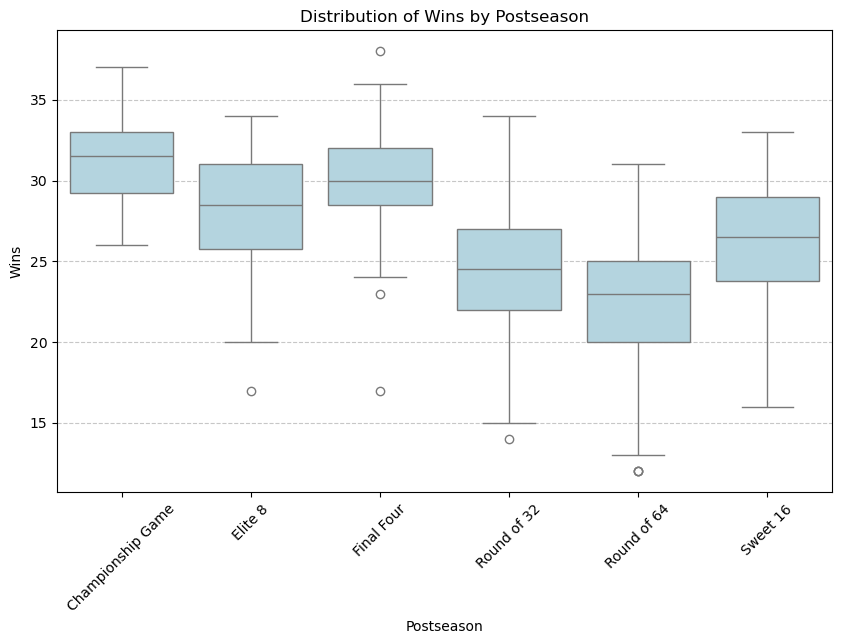

In [12]:
# Load the dataset
df = pd.read_csv("data/cbb.csv")

# Map POSTSEASON values to descriptive labels (if needed)
postseason_mapping = {
    'R64': 'Round of 64',
    'R32': 'Round of 32',
    'S16': 'Sweet 16',
    'E8': 'Elite 8',
    'F4': 'Final Four',
    '2ND': 'Championship Game',
    'Champ': 'Champion'
}
df['POSTSEASON'] = df['POSTSEASON'].map(postseason_mapping)

# Drop rows where POSTSEASON or Wins (W) are NaN (if necessary)
df = df.dropna(subset=['POSTSEASON', 'W'])

# Create the boxplot
# Create the boxplot using a set color (manual coloring)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='POSTSEASON', y='W', color='lightblue')  # Set a single color for all boxes
plt.title("Distribution of Wins by Postseason")
plt.xlabel("Postseason")
plt.ylabel("Wins")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for y-axis
plt.show()




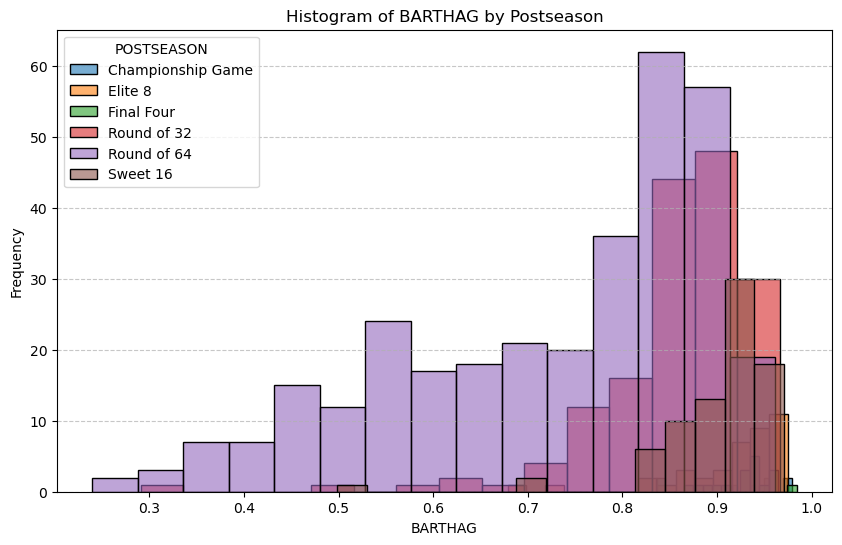

POSTSEASON
Round of 64          320
Round of 32          160
Sweet 16              80
Elite 8               40
Final Four            20
Championship Game     10
Name: count, dtype: int64


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("data/cbb.csv")

# Map POSTSEASON values to descriptive labels (if needed)
postseason_mapping = {
    'R64': 'Round of 64',
    'R32': 'Round of 32',
    'S16': 'Sweet 16',
    'E8': 'Elite 8',
    'F4': 'Final Four',
    '2ND': 'Championship Game',
    'Champ': 'Champion'
}
df['POSTSEASON'] = df['POSTSEASON'].map(postseason_mapping)

# Drop rows where POSTSEASON or BARTHAG are NaN
df = df.dropna(subset=['POSTSEASON', 'BARTHAG'])

# Create an overlayed histogram
plt.figure(figsize=(10, 6))
postseason_categories = df['POSTSEASON'].unique()
for category in postseason_categories:
    sns.histplot(
        data=df[df['POSTSEASON'] == category],
        x='BARTHAG',
        bins=15,
        kde=False,  # Turn off kernel density estimation
        label=category,
        alpha=0.6  # Set transparency for overlapping
    )
plt.title("Histogram of BARTHAG by Postseason")
plt.xlabel("BARTHAG")
plt.ylabel("Frequency")
plt.legend(title="POSTSEASON")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print(df['POSTSEASON'].value_counts())



['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR']
                TEAM  CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
7               Duke   ACC  39  35  125.2   90.6   0.9764   56.6   46.5  16.3   
8           Virginia   ACC  38  35  123.0   89.9   0.9736   55.2   44.7  14.7   
9     North Carolina   ACC  39  33  121.0   91.5   0.9615   51.7   48.1  16.2   
10         Villanova    BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
11         Villanova    BE  40  36  128.4   94.1   0.9725   59.5   48.5  15.0   
12       Connecticut  Amer  40  32  112.5   91.3   0.9171   51.5   44.6  17.3   
13        Louisville    BE  40  35  115.9   84.5   0.9743   50.6   44.8  18.3   
2456          Baylor   B12  24  22  123.2   94.5   0.9548   57.5   49.1  17.6   
2803          Kansas   B12  40  34  119.8   91.3   0.9580   53.8   45.8  17

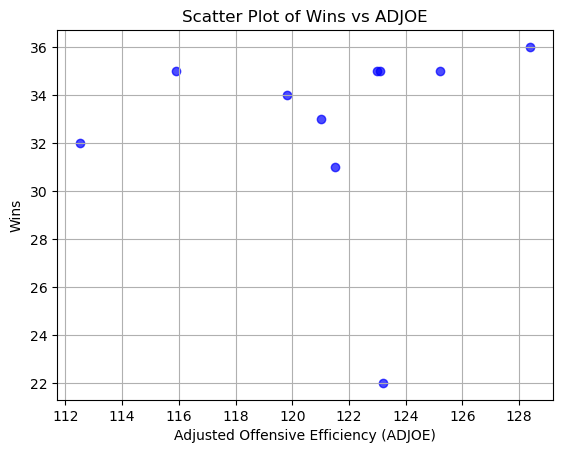

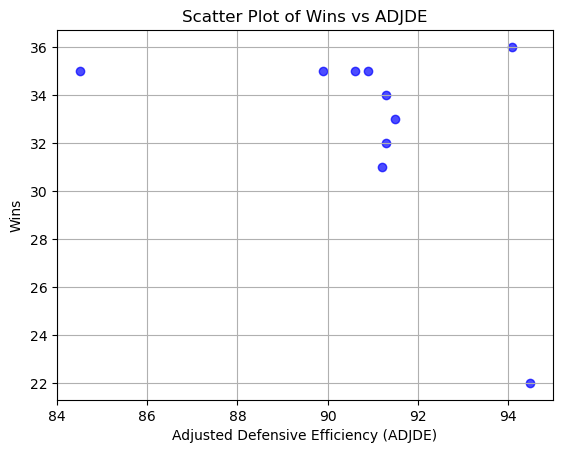

In [14]:
df = pd.read_csv("data/cbb.csv")
print(df.columns.tolist())



filtered_rows = df[df['POSTSEASON'] == 'Champions']
print(filtered_rows)

plt.scatter(filtered_rows['ADJOE'], filtered_rows['W'], alpha=0.7, color='blue')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJOE')
plt.grid()
plt.show()

plt.scatter(filtered_rows['ADJDE'], filtered_rows['W'], alpha=0.7, color='blue')
plt.xlabel('Adjusted Defensive Efficiency (ADJDE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJDE')
plt.grid()
plt.show()

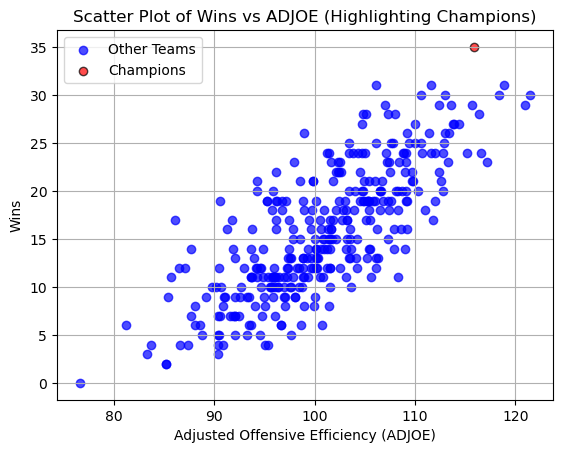

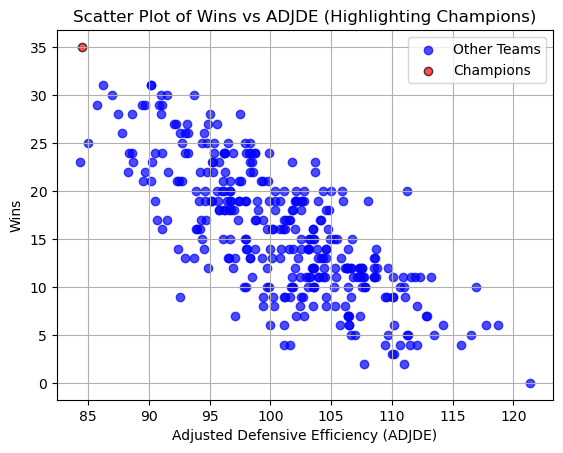

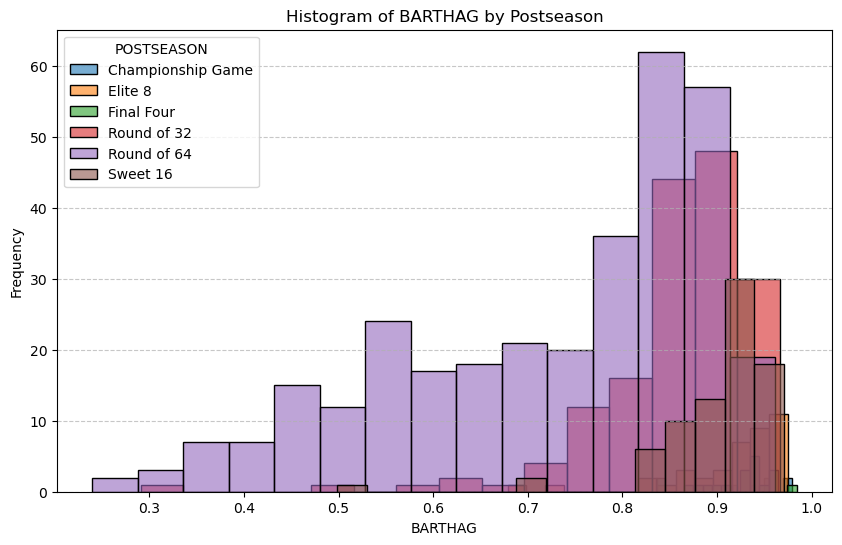

POSTSEASON
Round of 64          320
Round of 32          160
Sweet 16              80
Elite 8               40
Final Four            20
Championship Game     10
Name: count, dtype: int64


In [ ]:
# Filter data for the year 2013
first_datapoints = df[df['YEAR'] == 2013]

# Separate points to highlight (e.g., 'Champions') from the rest
champion_point = first_datapoints['POSTSEASON'] == 'Champions'
highlighted_points = first_datapoints[champion_point]
non_highlighted_points = first_datapoints[~champion_point]  # All other points

# Scatter plot for Wins vs ADJOE
plt.scatter(non_highlighted_points['ADJOE'], non_highlighted_points['W'],alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJOE'], highlighted_points['W'],alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJOE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

# Scatter plot for Wins vs ADJDE
plt.scatter(non_highlighted_points['ADJDE'],non_highlighted_points['W'], alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJDE'],highlighted_points['W'], alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Defensive Efficiency (ADJDE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJDE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

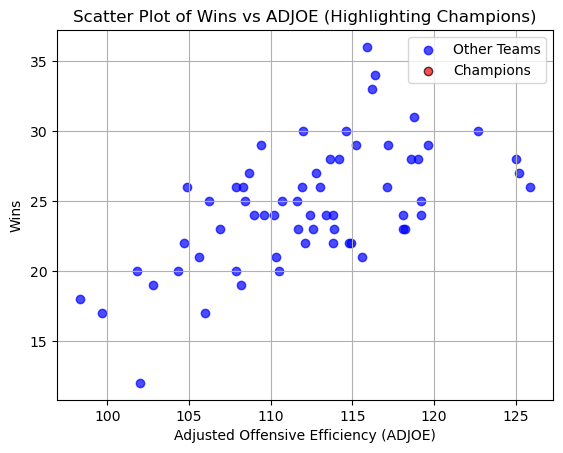

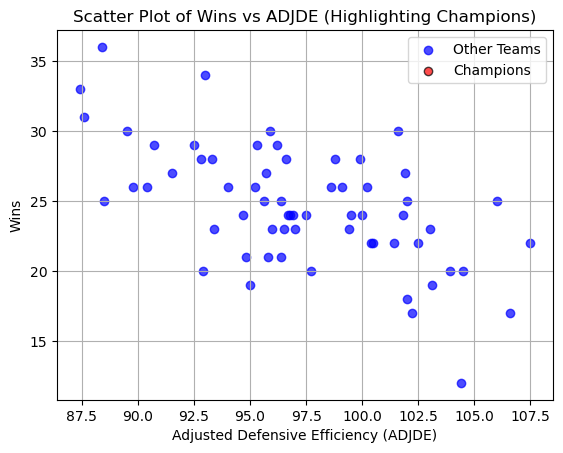

In [16]:
# Filter data for the year 2014
first_datapoints = df[df['YEAR'] == 2014]

# Separate points to highlight (e.g., 'Champions') from the rest
champion_point = first_datapoints['POSTSEASON'] == 'Champions'
highlighted_points = first_datapoints[champion_point]
non_highlighted_points = first_datapoints[~champion_point]  # All other points

# Scatter plot for Wins vs ADJOE
plt.scatter(non_highlighted_points['ADJOE'], non_highlighted_points['W'],alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJOE'], highlighted_points['W'],alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJOE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

# Scatter plot for Wins vs ADJDE
plt.scatter(non_highlighted_points['ADJDE'],non_highlighted_points['W'], alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJDE'],highlighted_points['W'], alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Defensive Efficiency (ADJDE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJDE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

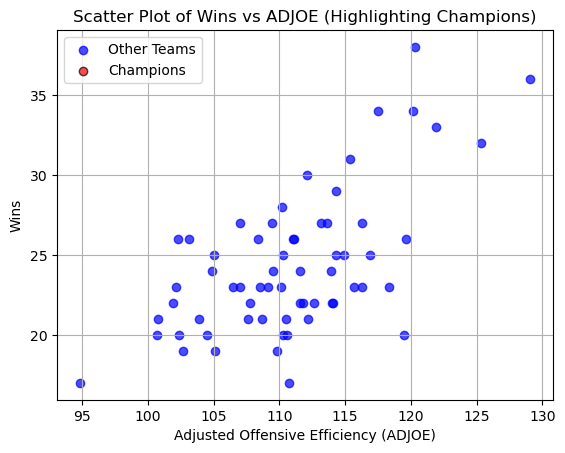

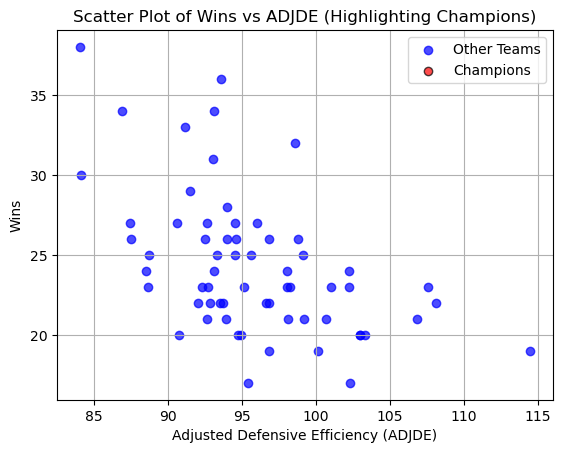

In [17]:
# Filter data for the year 2015
first_datapoints = df[df['YEAR'] == 2015]

# Separate points to highlight (e.g., 'Champions') from the rest
champion_point = first_datapoints['POSTSEASON'] == 'Champions'
highlighted_points = first_datapoints[champion_point]
non_highlighted_points = first_datapoints[~champion_point]  # All other points

# Scatter plot for Wins vs ADJOE
plt.scatter(non_highlighted_points['ADJOE'], non_highlighted_points['W'],alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJOE'], highlighted_points['W'],alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJOE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

# Scatter plot for Wins vs ADJDE
plt.scatter(non_highlighted_points['ADJDE'],non_highlighted_points['W'], alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJDE'],highlighted_points['W'], alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Defensive Efficiency (ADJDE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJDE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

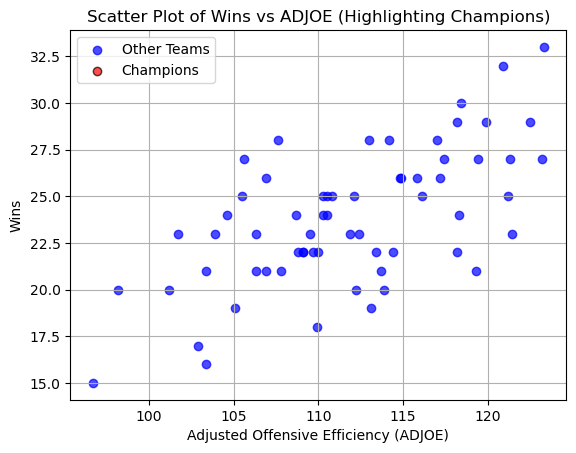

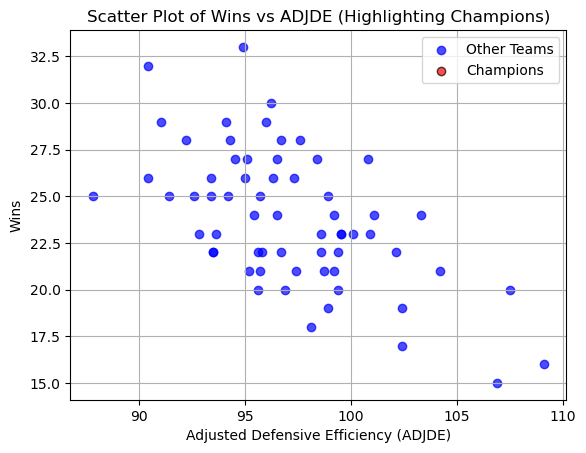

In [18]:
# Filter data for the year 2016
first_datapoints = df[df['YEAR'] == 2016]

# Separate points to highlight (e.g., 'Champions') from the rest
champion_point = first_datapoints['POSTSEASON'] == 'Champions'
highlighted_points = first_datapoints[champion_point]
non_highlighted_points = first_datapoints[~champion_point]  # All other points

# Scatter plot for Wins vs ADJOE
plt.scatter(non_highlighted_points['ADJOE'], non_highlighted_points['W'],alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJOE'], highlighted_points['W'],alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJOE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

# Scatter plot for Wins vs ADJDE
plt.scatter(non_highlighted_points['ADJDE'],non_highlighted_points['W'], alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJDE'],highlighted_points['W'], alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Defensive Efficiency (ADJDE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJDE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

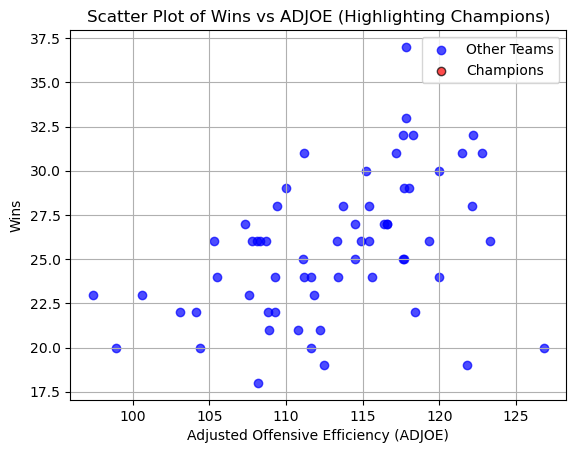

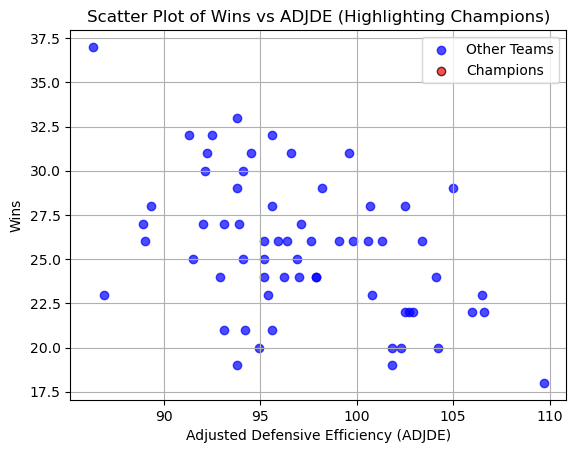

In [19]:
# Filter data for the year 2017
first_datapoints = df[df['YEAR'] == 2017]

# Separate points to highlight (e.g., 'Champions') from the rest
champion_point = first_datapoints['POSTSEASON'] == 'Champions'
highlighted_points = first_datapoints[champion_point]
non_highlighted_points = first_datapoints[~champion_point]  # All other points

# Scatter plot for Wins vs ADJOE
plt.scatter(non_highlighted_points['ADJOE'], non_highlighted_points['W'],alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJOE'], highlighted_points['W'],alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJOE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

# Scatter plot for Wins vs ADJDE
plt.scatter(non_highlighted_points['ADJDE'],non_highlighted_points['W'], alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJDE'],highlighted_points['W'], alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Defensive Efficiency (ADJDE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJDE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

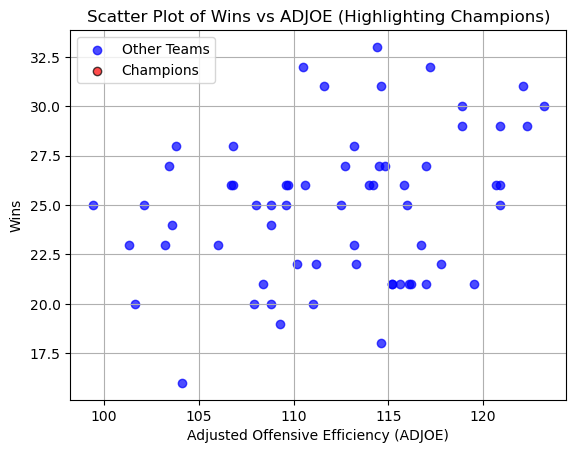

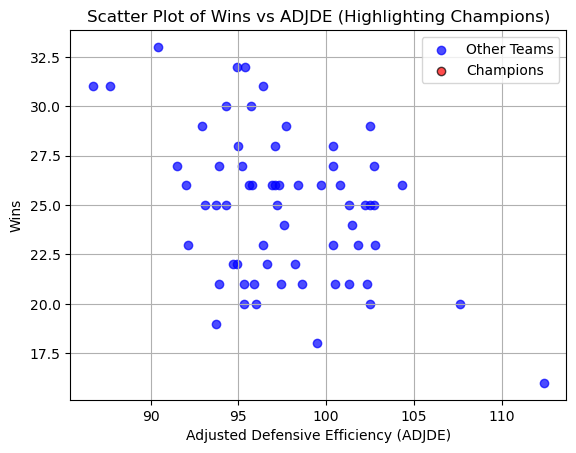

In [20]:
# Filter data for the year 2018
first_datapoints = df[df['YEAR'] == 2018]

# Separate points to highlight (e.g., 'Champions') from the rest
champion_point = first_datapoints['POSTSEASON'] == 'Champions'
highlighted_points = first_datapoints[champion_point]
non_highlighted_points = first_datapoints[~champion_point]  # All other points

# Scatter plot for Wins vs ADJOE
plt.scatter(non_highlighted_points['ADJOE'], non_highlighted_points['W'],alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJOE'], highlighted_points['W'],alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJOE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

# Scatter plot for Wins vs ADJDE
plt.scatter(non_highlighted_points['ADJDE'],non_highlighted_points['W'], alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJDE'],highlighted_points['W'], alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Defensive Efficiency (ADJDE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJDE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

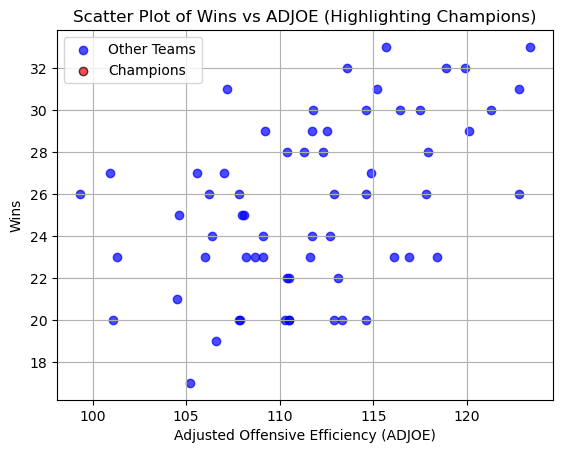

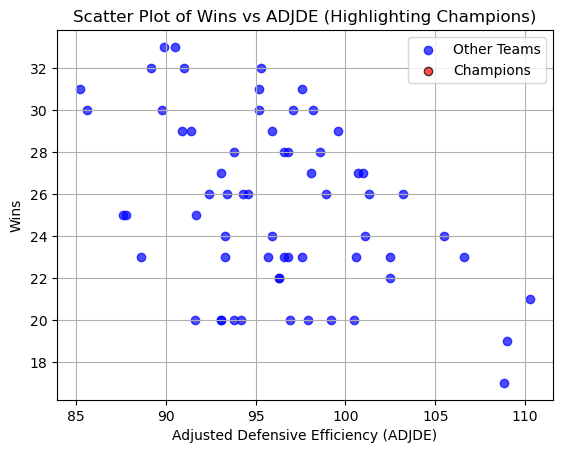

In [21]:
# Filter data for the year 2019
first_datapoints = df[df['YEAR'] == 2019]

# Separate points to highlight (e.g., 'Champions') from the rest
champion_point = first_datapoints['POSTSEASON'] == 'Champions'
highlighted_points = first_datapoints[champion_point]
non_highlighted_points = first_datapoints[~champion_point]  # All other points

# Scatter plot for Wins vs ADJOE
plt.scatter(non_highlighted_points['ADJOE'], non_highlighted_points['W'],alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJOE'], highlighted_points['W'],alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJOE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

# Scatter plot for Wins vs ADJDE
plt.scatter(non_highlighted_points['ADJDE'],non_highlighted_points['W'], alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJDE'],highlighted_points['W'], alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Defensive Efficiency (ADJDE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJDE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

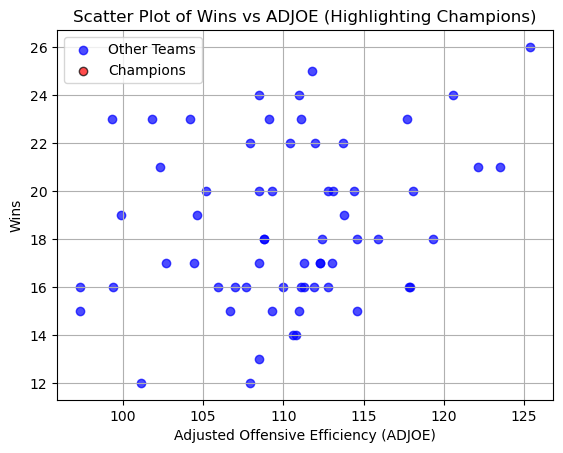

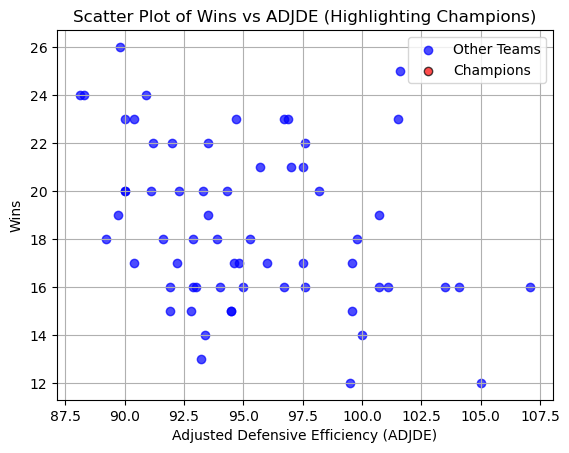

In [22]:
# Filter data for the year 2021
first_datapoints = df[df['YEAR'] == 2021]

# Separate points to highlight (e.g., 'Champions') from the rest
champion_point = first_datapoints['POSTSEASON'] == 'Champions'
highlighted_points = first_datapoints[champion_point]
non_highlighted_points = first_datapoints[~champion_point]  # All other points

# Scatter plot for Wins vs ADJOE
plt.scatter(non_highlighted_points['ADJOE'], non_highlighted_points['W'],alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJOE'], highlighted_points['W'],alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJOE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

# Scatter plot for Wins vs ADJDE
plt.scatter(non_highlighted_points['ADJDE'],non_highlighted_points['W'], alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJDE'],highlighted_points['W'], alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Defensive Efficiency (ADJDE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJDE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

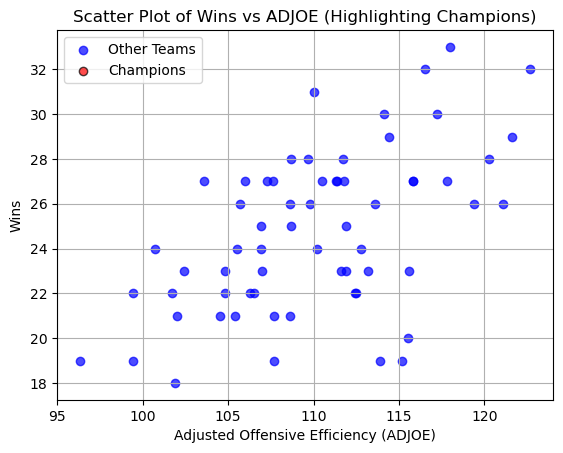

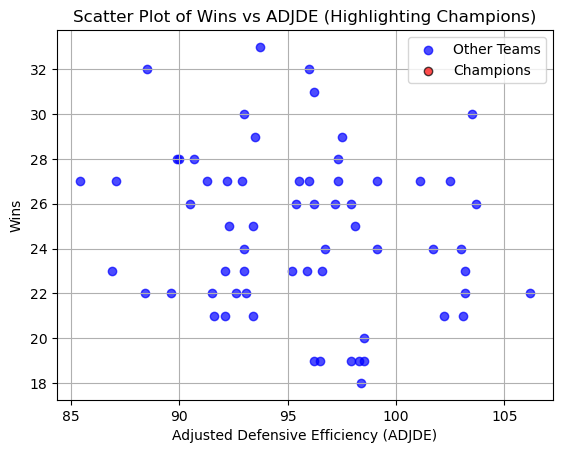

In [23]:
# Filter data for the year 2022
first_datapoints = df[df['YEAR'] == 2022]

# Separate points to highlight (e.g., 'Champions') from the rest
champion_point = first_datapoints['POSTSEASON'] == 'Champions'
highlighted_points = first_datapoints[champion_point]
non_highlighted_points = first_datapoints[~champion_point]  # All other points

# Scatter plot for Wins vs ADJOE
plt.scatter(non_highlighted_points['ADJOE'], non_highlighted_points['W'],alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJOE'], highlighted_points['W'],alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJOE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

# Scatter plot for Wins vs ADJDE
plt.scatter(non_highlighted_points['ADJDE'],non_highlighted_points['W'], alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJDE'],highlighted_points['W'], alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Defensive Efficiency (ADJDE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJDE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

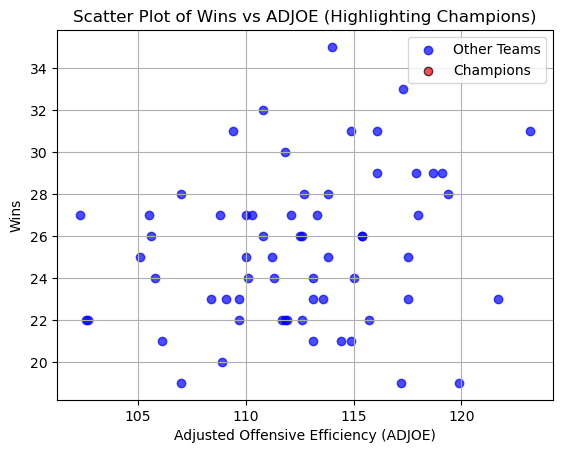

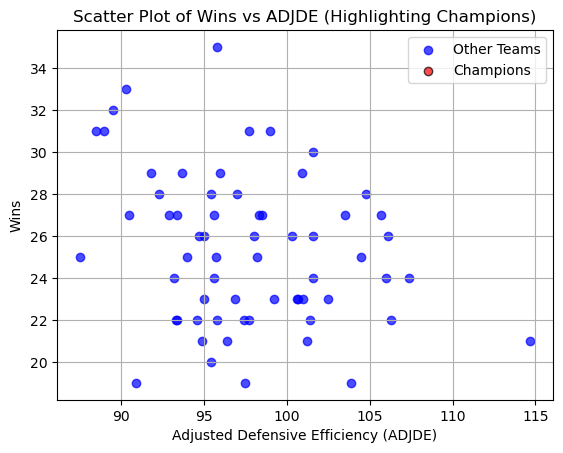

In [24]:
# Filter data for the year 2023
first_datapoints = df[df['YEAR'] == 2023]

# Separate points to highlight (e.g., 'Champions') from the rest
champion_point = first_datapoints['POSTSEASON'] == 'Champions'
highlighted_points = first_datapoints[champion_point]
non_highlighted_points = first_datapoints[~champion_point]  # All other points

# Scatter plot for Wins vs ADJOE
plt.scatter(non_highlighted_points['ADJOE'], non_highlighted_points['W'],alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJOE'], highlighted_points['W'],alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJOE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()

# Scatter plot for Wins vs ADJDE
plt.scatter(non_highlighted_points['ADJDE'],non_highlighted_points['W'], alpha=0.7, color='blue', label='Other Teams')
plt.scatter(highlighted_points['ADJDE'],highlighted_points['W'], alpha=0.7, color='red', label='Champions', edgecolor='black')
plt.xlabel('Adjusted Defensive Efficiency (ADJDE)')
plt.ylabel('Wins')
plt.title('Scatter Plot of Wins vs ADJDE (Highlighting Champions)')
plt.legend()
plt.grid()
plt.show()